# CLASSIFICATION OF NEWS GROUP TOPICS USING SVM

#### META INFORMATION

The 20 newsgroups dataset comprises around 18000 newsgroups posts on 20 topics split in two subsets: one for training (or development) and the other one for testing (or for performance evaluation). The split between the train and test set is based upon a messages posted before and after a specific date.


The Newsgroup and Document_id can be referenced against list.csv

Organization

Each newsgroup file in the bundle represents a single newsgroup.

Each message in a file is the text of some newsgroup document that was posted to that newsgroup.

This is a list of the 20 newsgroups:

1.alt.atheism

2 comp.graphics

3.comp.os.ms-windows.misc

 4.comp.sys.ibm.pc.hardware

 5.comp.sys.mac.hardware

 6.comp.windows.x

 7.misc.forsale

 8.rec.autos

 9.rec.motorcycles

 10.rec.sport.baseball

 11.rec.sport.hockey

 12.sci.crypt

 13.sci.electronics

 14.sci.med

 15.sci.space

 16.soc.religion.christian

 17.talk.politics.guns

 18.talk.politics.mideast

 19.talk.politics.misc

 20.talk.religion.misc

In [1]:
#fetching data from sklearn datasets
from sklearn.datasets import fetch_20newsgroups

In [2]:
newsgroups = fetch_20newsgroups()

In [3]:
from pprint import pprint
pprint(list(newsgroups.target_names))

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']


CLASSIFICATION CAN BE EITHEIR BINARY OR MULTI CLASSIFICATION 

Binary Classification: Binary Classification can be done by choosing any two target values why fetching train and test dataset.

MultiClass Classification: MultiClass Classification can be done by selecting all 20 target values for classification or more two values.

## BINARY CLASSIFICATION

In [4]:
categories= ['comp.windows.x','alt.atheism']

newsgroups_train= fetch_20newsgroups(subset='train', categories= categories, random_state=42)
newsgroups_test= fetch_20newsgroups(subset='test', categories=categories, random_state=42)

#getting train and test data from newsgroup20 dataset

#### Before building SVM MODEL for classifying we need to clean and analyze data by using NLP and NLP TOOL KIT.

### Preprocessing of data is done using Feature extraction , Vectorization , lemmatization , Removing stopwords etc.

In [5]:
#importing nlp toolkit and required libraries
import nltk 
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import names
from nltk.stem import WordNetLemmatizer

In [6]:
#Essential downloads
nltk.download('names')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Unzipping corpora/names.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

#### Function for removing punctuation ,stopwords .
#### Stopwords- These are commonly used words like the, and, but that don't contribute much to the meaning of a sentence

In [7]:
all_names=set(names.words())


lemmatizer=WordNetLemmatizer()

def is_letter_only(word):
    return word.isalpha()

from nltk.corpus import stopwords
stop_words= stopwords.words('english')


#### Function for Tokenazation , stemming , lemmatizing data.
####  Tokenization- Tokenizing is splitting some string or sentence into a list of words.
#### Stemming- some portion of characters removed from the word.

In [8]:
def clean_text(docs):
    docs_cleaned=[]
    for doc in docs:
        doc=doc.lower()
        doc_cleaned=' '.join(lemmatizer.lemmatize(word) for word in doc.split()
                            if is_letter_only(word) and word not in all_names and word not in stop_words)
        docs_cleaned.append(doc_cleaned)
    return docs_cleaned

In [9]:
#cleaning data by using above functions
cleaned_train= clean_text(newsgroups_train.data)
label_train= newsgroups_train.target

In [10]:
cleaned_test= clean_text(newsgroups_test.data)
label_test= newsgroups_test.target

In [11]:
label_train

array([1, 0, 1, ..., 0, 1, 0])

In [12]:
label_test

array([0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,

In [13]:
#Vectorization
# Count vectorization- This creates a document-term matrix where the entry of each cell will be a count of
# the number of that word in that document
# TfIdf vectorization
# Tfidfvectorizer- term frequency inverse document frequency


from collections import Counter
Counter(label_train)

Counter({1: 593, 0: 480})

In [14]:
tfidf_vectorizer= TfidfVectorizer(stop_words='english',max_features=None)
term_docs_train= tfidf_vectorizer.fit_transform(cleaned_train)
term_docs_test=tfidf_vectorizer.transform(cleaned_test)

### BUILDING SVM MODEL

In [15]:
#importing numpy ,SVC ,GridSearchCV to build svm model
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [16]:
#Linear SVM model
svm=SVC(kernel='linear', random_state=42)
svm.fit(term_docs_train, label_train)
accuracy= svm.score(term_docs_test, label_test)
print("The accuracy of Binary classification of Newsgroups is : {0:.1f}%".format(accuracy*100))

The accuracy of Binary classification of Newsgroups is : 98.0%


In [17]:
#Trying out best estimator amoung all permutations and combinations
depth_range = np.linspace(1, 10, num=10)
svc = SVC(random_state=42)
parameters = {'kernel':('linear', 'poly', 'rbf'), 'C':depth_range, 'gamma': ('scale', 'auto')}
clf = GridSearchCV(estimator=svc, param_grid=parameters, cv=10, n_jobs=-1, scoring='roc_auc')
clf.fit(term_docs_train, label_train)

GridSearchCV(cv=10, estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
                         'gamma': ('scale', 'auto'),
                         'kernel': ('linear', 'poly', 'rbf')},
             scoring='roc_auc')

In [18]:
print("The best estimator across ALL searched params:\n", clf.best_estimator_)
print("The best score across ALL searched params:\n", clf.best_score_)
print("The best parameters across ALL searched params:\n", clf.best_params_)

The best estimator across ALL searched params:
 SVC(kernel='linear', random_state=42)
The best score across ALL searched params:
 0.9997887241054613
The best parameters across ALL searched params:
 {'C': 1.0, 'gamma': 'scale', 'kernel': 'linear'}


In [19]:
svc.set_params(**clf.best_params_)

SVC(kernel='linear', random_state=42)

In [20]:
svc.fit(term_docs_train, label_train)

SVC(kernel='linear', random_state=42)

In [21]:
label_pred = svc.predict(term_docs_test)
label_pred

array([0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,

In [22]:
acc_score=accuracy_score(label_test, label_pred)
acc_score

0.9803921568627451

In [23]:
print("The accuracy of Binary classification of Newsgroups is : {0:.1f}%".format(acc_score*100))

The accuracy of Binary classification of Newsgroups is : 98.0%


#### Accuracy measures and Confusion matrix

In [24]:
from sklearn.metrics import classification_report
prediction= svm.predict(term_docs_test)
report= classification_report(label_test, prediction)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       319
           1       0.98      0.99      0.98       395

    accuracy                           0.98       714
   macro avg       0.98      0.98      0.98       714
weighted avg       0.98      0.98      0.98       714



In [25]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
confusion_matrix=confusion_matrix(label_test,label_pred)
confusion_matrix

array([[309,  10],
       [  4, 391]])

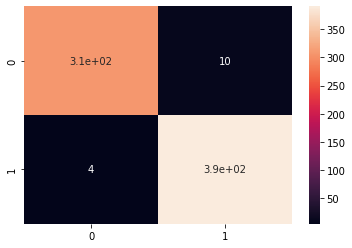

In [26]:
import seaborn as sns
sns.heatmap(confusion_matrix, annot=True)

## MULTICLASS CLASSIFICATION

In [27]:
# Multiclass classification using all 20 target values.

categories=[
 'alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc'
]

In [28]:
#splitting dataset
data_train = fetch_20newsgroups(subset='train', categories= categories, random_state=42)
data_test = fetch_20newsgroups(subset='test',categories= categories, random_state=42)

In [29]:
from pprint import pprint
pprint(list(data_train.target_names))

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']


In [30]:
#labeling the train and test data
train_label=data_train.target
test_label=data_test.target

In [31]:
train_label

array([7, 4, 4, ..., 3, 1, 8])

In [32]:
test_label

array([ 7,  5,  0, ...,  9,  6, 15])

In [33]:
np.unique(test_label)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [34]:
np.unique(train_label)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

#### Preprocessing of dataset.Removing stopwords,punctuations Tokenization , Stemming ,Lemmatization,cleaning of dataset.


In [35]:
#function for preprocessing
from collections import defaultdict
from nltk.stem import WordNetLemmatizer
from nltk.corpus import names

all_names = names.words()
WNL = WordNetLemmatizer()
def clean(data):
    cleaned = defaultdict(list)
    count = 0
    for group in data:
        for words in group.split():
            if words.isalpha() and words not in all_names:
                cleaned[count].append(WNL.lemmatize(words.lower()))
        cleaned[count] = ' '.join(cleaned[count])
        count +=1 
    return(list(cleaned.values()))

In [36]:
x_train = clean(data_train.data)
x_test = clean(data_test.data)

In [37]:
len(x_train)

11314

In [38]:
len(x_test)

7532

In [39]:
#Vectorization of dataset
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer(stop_words='english', max_features=None )
train_data = tf.fit_transform(x_train)
test_data = tf.transform(x_test)
train_data.shape, test_data.shape

((11314, 46583), (7532, 46583))

#### Building SVM model.

In [40]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

#### Linear SVM

In [41]:
svm=SVC(kernel='linear', random_state=42)
svm.fit(train_data, train_label)
accuracy= svm.score(test_data,test_label)
print("The accuracy of 5-class classification is : {0:.1f}%".format(accuracy*100))

The accuracy of 5-class classification is : 77.9%


In [50]:
pred_label = svm.predict(test_data)
pred_label

array([ 1,  6,  0, ...,  9, 12, 15])

In [51]:
accuracy_score(test_label, pred_label)

0.7793414763674986

In [60]:
accur_score=accuracy_score(test_label, pred_label)
print("The accuracy of MultiClass classification of Newsgroups is : {0:.1f}%".format(accur_score*100))

The accuracy of MultiClass classification of Newsgroups is : 77.9%


#### Accuracy measures and Confusion matrix 

In [52]:
from sklearn.metrics import classification_report
prediction= svm.predict(test_data)
report= classification_report(test_label, prediction)
print(report)

              precision    recall  f1-score   support

           0       0.70      0.68      0.69       319
           1       0.64      0.78      0.70       389
           2       0.71      0.66      0.69       394
           3       0.64      0.72      0.68       392
           4       0.79      0.73      0.76       385
           5       0.77      0.69      0.72       395
           6       0.68      0.83      0.75       390
           7       0.85      0.84      0.84       396
           8       0.92      0.88      0.90       398
           9       0.89      0.89      0.89       397
          10       0.96      0.91      0.93       399
          11       0.95      0.85      0.90       396
          12       0.70      0.73      0.71       393
          13       0.83      0.86      0.84       396
          14       0.93      0.86      0.89       394
          15       0.71      0.82      0.76       398
          16       0.69      0.85      0.76       364
          17       0.97    

In [53]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
cof=confusion_matrix(test_label,pred_label)
cof

array([[218,   1,   1,   1,   0,   0,   3,   2,   2,   2,   0,   1,   1,
          8,   3,  38,   2,   3,   4,  29],
       [  4, 305,  11,  11,   6,  22,   7,   1,   0,   2,   1,   2,  11,
          2,   2,   1,   0,   0,   1,   0],
       [  1,  28, 262,  34,  11,  27,   8,   1,   2,   1,   0,   0,   5,
          4,   1,   2,   0,   0,   5,   2],
       [  0,  13,  28, 282,  23,   4,  17,   1,   2,   1,   0,   0,  20,
          1,   0,   0,   0,   0,   0,   0],
       [  2,   8,  14,  40, 281,   3,  12,   2,   0,   0,   1,   1,  19,
          1,   0,   0,   0,   0,   1,   0],
       [  0,  66,  35,   6,   3, 271,   4,   0,   0,   0,   0,   0,   6,
          1,   3,   0,   0,   0,   0,   0],
       [  0,   4,   7,  23,  10,   0, 322,   7,   1,   1,   0,   1,   8,
          3,   1,   0,   0,   0,   0,   2],
       [  0,   6,   1,   1,   1,   1,  16, 331,  13,   2,   0,   0,  15,
          3,   0,   0,   1,   0,   2,   3],
       [  0,   0,   0,   0,   0,   1,   8,  20, 352,   4,   0,  

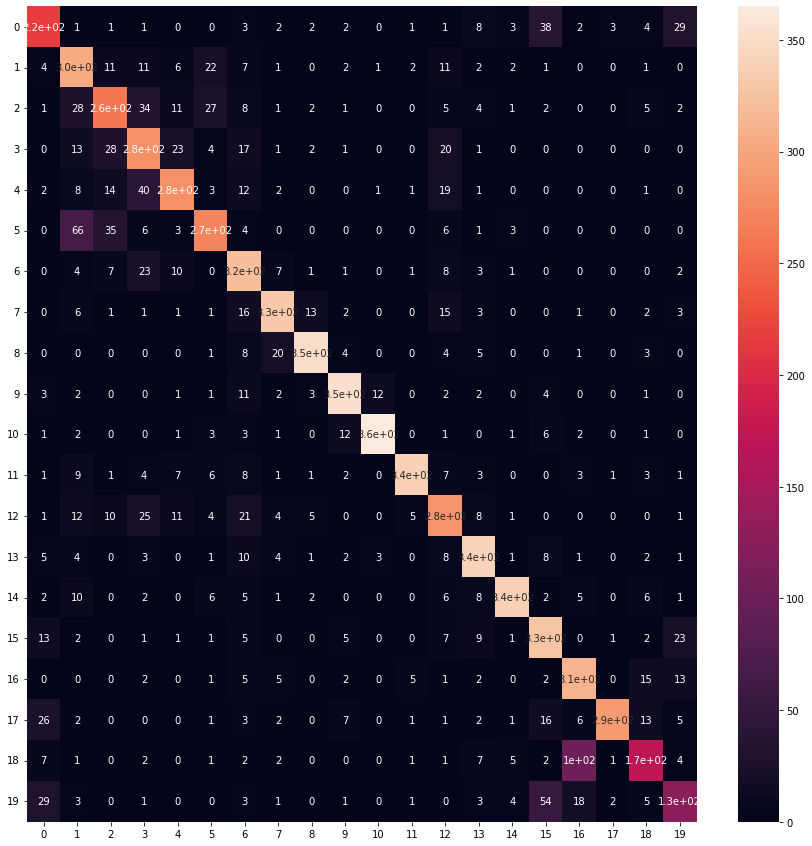

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cof, annot=True)
plt.gcf().set_size_inches(15, 15)

#### The accuracy of Binary classification of Newsgroups is :98.0%
#### The accuracy of MultiClass(for all target values) classification of Newsgroups is : 77.9%.